INTRODUCTION

A fictional telco company that provided home phone and Internet services to 7043 customers in California in Quarter 3 of the fiscal year.

Data Description
CustomerID: A unique ID that identifies each customer.
Country: The country of the customer’s primary residence.
State: The state of the customer’s primary residence.
City: The city of the customer’s primary residence.
Zip Code: The zip code of the customer’s primary residence.
Gender: The customer’s gender: Male, Female
Senior Citizen: Indicates if the customer is 65 or older: Yes, No
Partner: Indicate if the customer has a partner: Yes, No
Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.


In [1]:
# import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Q1: Please read the file and explain data types statistically as well as how python is reading it. 
#Please let us know if any data type is read wrong.


# read the file
telco = pd.read_excel("/content/Telco_customer_churn.xlsx") # givin the variable name as "telco".
telco #print output


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.0,59.0,2793.0,NaN


In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

There are 5174 null values in churn Resaon column,rest are non-null. And here python is reading Total Charges column values as Object but it is float data type 

In [ ]:
#telco["Total Charges"].values
pd.to_numeric(telco["Total Charges"],errors = "coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: Total Charges, Length: 7043, dtype: bool

In [ ]:
telco[pd.to_numeric(telco["Total Charges"],errors = "coerce").isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1.0,United States,California,San Bernardino,92408.0,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,,No,0.0,36.0,2578.0,NaN
2438,3115-CZMZD,1.0,United States,California,Independence,93526.0,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,,No,0.0,68.0,5504.0,NaN
2568,5709-LVOEQ,1.0,United States,California,San Mateo,94401.0,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,,No,0.0,45.0,2048.0,NaN
2667,4367-NUYAO,1.0,United States,California,Cupertino,95014.0,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,,No,0.0,48.0,4950.0,NaN
2856,1371-DWPAZ,1.0,United States,California,Redcrest,95569.0,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,,No,0.0,30.0,4740.0,NaN
4331,7644-OMVMY,1.0,United States,California,Los Angeles,90029.0,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,,No,0.0,53.0,2019.0,NaN
4687,3213-VVOLG,1.0,United States,California,Sun City,92585.0,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,,No,0.0,49.0,2299.0,NaN
5104,2520-SGTTA,1.0,United States,California,Ben Lomond,95005.0,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,,No,0.0,27.0,3763.0,NaN
5719,2923-ARZLG,1.0,United States,California,La Verne,91750.0,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,,No,0.0,69.0,4890.0,NaN
6772,4075-WKNIU,1.0,United States,California,Bell,90201.0,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,,No,0.0,44.0,2342.0,NaN


There are white spaces in Total Charges column.

In [ ]:
telco[pd.to_numeric(telco["Total Charges"],errors = "coerce").isnull()].shape

(11, 33)

checking the how many white spaces are there in total charges column

In [ ]:
telco.iloc[2234]

CustomerID                          4472-LVYGI
Count                                      1.0
Country                          United States
State                               California
City                            San Bernardino
Zip Code                               92408.0
Lat Long                34.084909, -117.258107
Latitude                             34.084909
Longitude                          -117.258107
Gender                                  Female
Senior Citizen                              No
Partner                                    Yes
Dependents                                  No
Tenure Months                              0.0
Phone Service                               No
Multiple Lines                No phone service
Internet Service                           DSL
Online Security                            Yes
Online Backup                               No
Device Protection                          Yes
Tech Support                               Yes
Streaming TV 

In [5]:
telco_1 = telco[telco["Total Charges"] != " "]
telco_1
telco_1.shape

(7032, 33)

Dropping the White spaces in the Total Charges column.

In [6]:
# After dropping the blank columns, now coverting the Dtype of Total Charges to "Float"
telco_1["Total Charges"]=pd.to_numeric(telco_1["Total Charges"])
#telco_1                       
telco_1["Total Charges"].dtypes     
#telco_1.info()                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('float64')

In [7]:
#Q2: Please apply appropriate statistical measures using python based on data types.

telco_1.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7032.0,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,1.0,93523.032565,36.283307,-119.799215,32.421786,64.798208,2283.300441,0.265785,58.715301,4401.445108
std,0.0,1865.515958,2.456118,2.157588,24.545260,30.085974,2266.771362,0.441782,21.531321,1182.414266
min,1.0,90001.000000,32.555828,-124.301372,1.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.587500,401.450000,0.000000,40.000000,3469.750000
50%,1.0,93552.500000,36.391777,-119.735410,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.500000
75%,1.0,95354.000000,38.227285,-118.043237,55.000000,89.862500,3794.737500,1.000000,75.000000,5381.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


minimum

* Minimum monthly charges are paid by the both the genders are 18.25 based on city and available facilities
* Minimum Total charges are paid by the both the genders are 18.8 based on city and available facilities

# Maximum
* Maximum monthly charges are paid by the both the genders are 118.75 based on city and avaliable facilities
* Maximum Total charges are paid by the both the genders are 8684.8 based on city and available facilities

# Mean
* Peoples pay monthly charges, Average of 64.798208 
* Whereas total charges paid by them, Average of 2283.300441

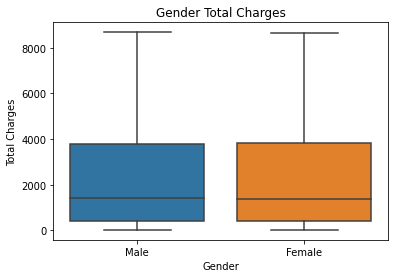

In [8]:
#Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

sns.boxplot( x= "Gender" , y= "Total Charges" , data = telco_1) #using boxplot 
plt.title("Gender Total Charges")
plt.xlabel("Gender")
plt.ylabel("Total Charges") # naming the y-axis
plt.show() # print output


Both the genders pays total charges equally.

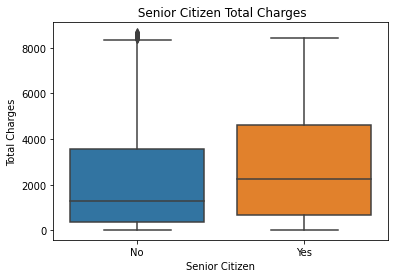

In [9]:
sns.boxplot( x= "Senior Citizen" , y = "Total Charges" , data = telco_1)
plt.title(" Senior Citizen Total Charges")
plt.xlabel("Senior Citizen") # naming the x-axis
plt.ylabel("Total Charges")
plt.show() #print output

Those who are not senior citizens pays less total charges, and Those who are senoir citizens pays high total charges

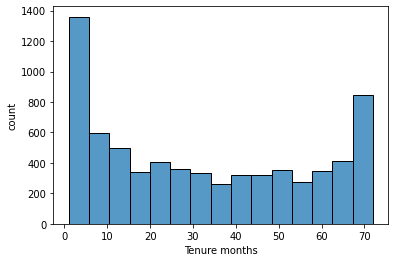

In [12]:
#Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. 
#Based on distribution, perform appropriate statistical measures.
# Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

sns.histplot(x="Tenure Months" , data = telco_1)
plt.xlabel("Tenure months")
plt.ylabel("count")
plt.show() #printoutput
#sns.distplot(telco_1["Tenure Months"])

In [ ]:
#Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.


for column in telco:
  print(telco[column].unique())


['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
[1.]
['United States']
['California']
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
[90003. 90005. 90006. ... 96128. 96134. 96146.]
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
[33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
[-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
['Male' 'Female']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
[ 2.  8. 28. 49. 10.  1. 47. 17.  5. 34. 11. 15. 18.  9.  7. 12. 25. 68.
 55. 37.  3. 27. 20.  4. 58. 53. 13.  6. 19. 59. 16. 52. 24. 32. 38. 54.
 43. 63. 21. 69. 22. 61. 60. 48. 40. 23. 39. 35. 56. 65. 33. 30. 45. 46.
 62. 70. 50. 44. 71. 26. 14. 41. 66. 64. 29. 42. 67. 51. 31. 57. 36. 72.
  0.]
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['Yes'

checking the unique values in each column.

In [ ]:
#telco_1[column].dtypes == "object"
telco_1.replace('No internet service','No',inplace=True)
telco_1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


replacing "No internet service" with "No"
And "No phone service" with "No"

In [ ]:
telco_1["Internet Service"].unique()
telco_1["Phone Service"].unique()

array(['Yes', 'No'], dtype=object)

here we can see that it got replaced when we use the above code.

In [13]:
#Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

telco_1.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

checking the all columns.

In [ ]:
telco_1["Gender"].replace({"Female" : 1, "Male" : 0},inplace=True)
telco_1["Gender"].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([0, 1])

replacing "Female" with 1 and "Male" with 0.

In [ ]:
yes_no = [ 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing','Churn Label']
for col in yes_no:
         telco_1[col].replace({'Yes':1,'No':0},inplace=True)


Replacing the all Yes and No's with 1 and 0 in every column values.

In [ ]:
telco_1["Senior Citizen"].unique()
telco_1["Partner"].unique()


array([0, 1])

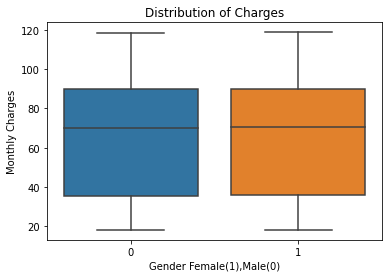

In [ ]:
#Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 


sns.boxplot(x="Gender" ,y ="Monthly Charges", data = telco_1)
plt.title("Distribution of Charges")
plt.xlabel("Gender Female(1),Male(0)")
plt.ylabel("Monthly Charges")
plt.show()

In [ ]:
#Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.



db=telco_1[telco_1["City"]=="Los Angeles"]
db[db["Total Charges"] == db ["Total Charges"].min()] # finding the min total charge for los angeles city




#telco_1["Total Charges"].min()




,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
3087,2967-MXRAV,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,0,...,One year,0,Mailed check,18.8,18.8,0,0.0,51.0,5160.0,NaN


In [ ]:
#telco_1["Zip Code"].max()
#telco_1["Total Charges"].max()



bd=telco_1[telco_1["Total Charges"]== 8684.8]  # finding the max total charge that  which zip code has. 
bd[bd["Zip Code"] == bd ["Zip Code"].max()]




,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1206,2889-FPWRM,1.0,United States,California,Mckinleyville,95519.0,"40.965011, -124.015255",40.965011,-124.015255,Male,...,One year,Yes,Bank transfer (automatic),117.8,8684.8,Yes,1.0,100.0,4432.0,Competitor offered higher download speeds


In regplot, we can see the line which shows that there is a positive corelation. so,that monthly charges and total charges are positively corelated.

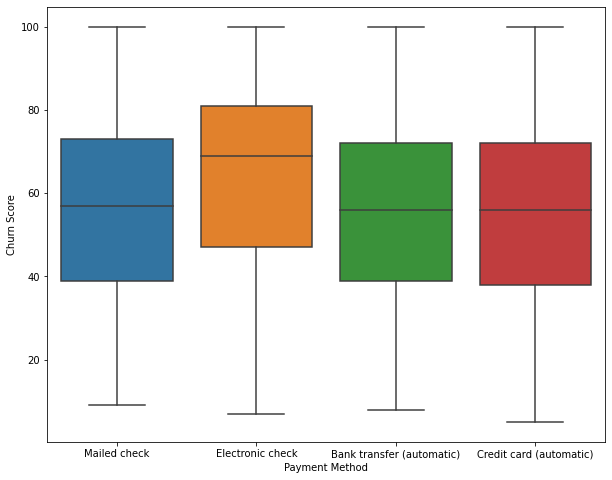

In [ ]:
#Q8: Please find which payment method has the highest churn score and which has the lowest churn score.

plt.figure(figsize=(10,8))
sns.boxplot(x="Payment Method" , y= "Churn Score" , data = telco_1)

we can see that Electronic Check having the highest churn score and rest are having lowest churn score when compared to Electronic check payment method.

In [ ]:
#Q9: Please create an appropriate plot to check the count of payment methods and explain it.


telco_1.groupby(by = "Payment Method").size() # using groupby function and size , gives the exact values that are present in the dataset

Payment Method
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Electronic check             2365
Mailed check                 1604
dtype: int64

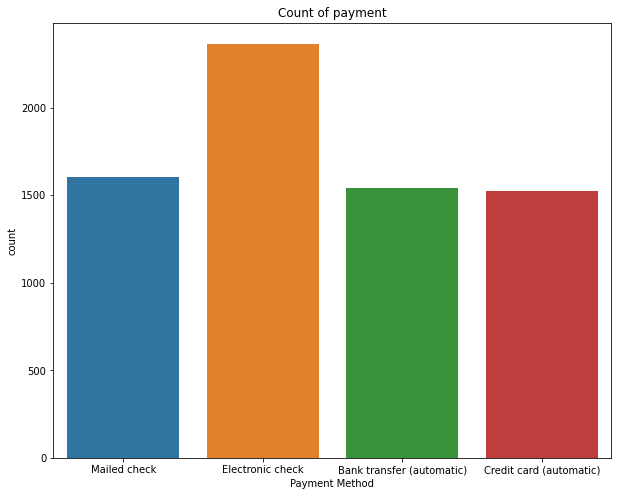

In [16]:

plt.figure(figsize=(10,8))  #giving the plot height and width
plt.title("Count of payment") # title of the plot
plt.xlabel("Payment Methods")
plt.ylabel("Count")
sns.countplot(x = "Payment Method" ,data = telco_1) 

It is observed that the most of the customers are used Electronic Check for payment of bills

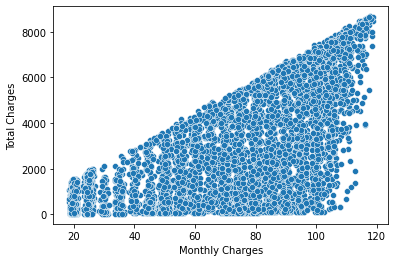

In [ ]:
#Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.

sns.scatterplot(x ='Monthly Charges' , y = 'Total Charges' , data = telco_1 )
plt.title("Relationship between Monthly charges and Total charges") # giving the title for plot
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.show() # printout

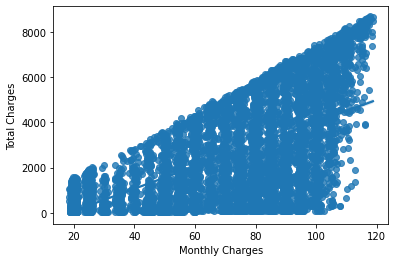

In [ ]:
sns.regplot(x ='Monthly Charges' , y = 'Total Charges' , data = telco_1 )

In regplot, we can see the line which shows that there is a positive corelation. so,that monthly charges and total charges are positively corelated.